In [1]:
# import pandas, nltk, and vader
import nltk
import pandas as pd
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# load tweets into a dataframe
df = pd.read_json(os.path.join('condensed_2018.json'))

In [3]:
df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [4]:
# drop retweets
dfRt = df[~df.text.str.startswith('RT')]

In [5]:
dfRt

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [6]:
dfRt['created_at'] = pd.to_datetime(dfRt['created_at'])

dfRt['month_of_year'] = dfRt['created_at'].dt.month_name()
dfRt.head()

C:\Users\Hailu\OneDrive\Documents\PREWORK_HLS\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hailu\OneDrive\Documents\PREWORK_HLS\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,December
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",December
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,December
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,December
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",December


In [51]:
January_df=dfRt.loc[dfRt['month_of_year'] == "January"]
January_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year,vScore
3363,2018-01-31 02:00:02,109076,958520216429957120,NaN,False,22023,Twitter for iPhone,Join me live for the #SOTU\nhttps://t.co/0SLkt...,January,NaN
3364,2018-01-29 20:12:39,84209,958070403901124608,NaN,False,16431,Twitter for iPhone,Congratulations to America’s new Secretary of ...,January,NaN
3365,2018-01-28 13:18:33,199787,957603804383465472,NaN,False,42337,Twitter for iPhone,Our economy is better than it has been in many...,January,NaN
3366,2018-01-28 13:18:32,240489,957603800579297280,NaN,False,64122,Twitter for iPhone,Somebody please inform Jay-Z that because of m...,January,NaN
3367,2018-01-28 04:08:02,157413,957465263129219072,NaN,False,35964,Twitter for iPhone,Democrats are not interested in Border Safety ...,January,NaN
3368,2018-01-28 03:58:02,175856,957462746060206080,NaN,False,47047,Twitter for iPhone,"I have offered DACA a wonderful deal, includin...",January,NaN
3369,2018-01-27 22:59:52,114304,957387711693905920,NaN,False,22155,Twitter for iPhone,"Taliban targeted innocent Afghans, brave polic...",January,NaN
3370,2018-01-27 19:30:24,107944,957334999522533376,NaN,False,25987,Twitter for iPhone,On Holocaust Remembrance Day we mourn and grie...,January,NaN
3371,2018-01-27 11:55:58,124248,957220637705109504,NaN,False,29292,Twitter for iPhone,Thank you to Brandon Judd of the National Bord...,January,NaN
3372,2018-01-26 23:27:23,72341,957032249509097472,NaN,False,16392,Twitter for iPhone,Thank you for the wonderful welcome @WEF! #Dav...,January,NaN


In [43]:
# setting text column to a varible
sentences = January_df["text"]

In [44]:
type(sentences)

pandas.core.series.Series

In [45]:
sentences = sentences.to_string()

In [46]:
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)

In [47]:
sid = SentimentIntensityAnalyzer()

In [49]:
#JANUARY S2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.045, 'neu': 0.636, 'pos': 0.319, 'compound': 0.9827}
{'neg': 0.035, 'neu': 0.8, 'pos': 0.166, 'compound': 0.9835}
{'neg': 0.027, 'neu': 0.838, 'pos': 0.134, 'compound': 0.7574}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9225}
{'neg': 0.07, 'neu': 0.764, 'pos': 0.165, 'compound': 0.8566}
{'neg': 0.081, 'neu': 0.835, 'pos': 0.085, 'compound': -0.4568}
{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.8955}
{'neg': 0.126, 'neu': 0.796, 'pos': 0.078, 'compound': -0.9089}
{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.2228}
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.127, 'neu': 0.738, 'pos': 0.135, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.8832}
{'neg': 0.137, 'neu': 0.679, 'pos': 0.185, 'compound': 0.874}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.8805}


In [50]:
# setting text column to a varible
sentences = January_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#JANUARY 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.045, 'neu': 0.636, 'pos': 0.319, 'compound': 0.9827}
{'neg': 0.035, 'neu': 0.8, 'pos': 0.166, 'compound': 0.9835}
{'neg': 0.027, 'neu': 0.838, 'pos': 0.134, 'compound': 0.7574}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9225}
{'neg': 0.07, 'neu': 0.764, 'pos': 0.165, 'compound': 0.8566}
{'neg': 0.081, 'neu': 0.835, 'pos': 0.085, 'compound': -0.4568}
{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.8955}
{'neg': 0.126, 'neu': 0.796, 'pos': 0.078, 'compound': -0.9089}
{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.2228}
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.127, 'neu': 0.738, 'pos': 0.135, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.8832}
{'neg': 0.137, 'neu': 0.679, 'pos': 0.185, 'compound': 0.874}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.8805}


In [15]:
February_df=dfRt.loc[dfRt['month_of_year'] == "February"]
February_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
3188,2018-02-28 21:34:16,53608,968962582374621184,NaN,False,11747,Media Studio,It was an honor to welcome bipartisan members ...,February
3189,2018-02-28 19:01:34,73093,968924154031497216,NaN,False,17341,Twitter for iPhone,Today we honor Billy Graham as only three priv...,February
3190,2018-02-28 18:36:53,66631,968917941671612416,NaN,False,14381,Twitter for iPhone,"Starting at a small Bible School in Florida, B...",February
3191,2018-02-28 17:10:22,75066,968896168230051840,NaN,False,17637,Twitter for iPhone,"Today, in the center of this great Chamber lie...",February
3192,2018-02-28 14:34:37,90393,968856971075051520,NaN,False,25454,Twitter for iPhone,Why is A.G. Jeff Sessions asking the Inspector...,February
3193,2018-02-28 14:08:21,112466,968850364383596544,NaN,False,21076,Twitter for iPhone,45 year low on illegal border crossings this y...,February
3194,2018-02-28 12:29:56,101499,968825596133478400,NaN,False,22435,Twitter for iPhone,I have decided that sections of the Wall that ...,February
3195,2018-02-28 12:02:58,94791,968818810005450752,NaN,False,23665,Twitter for iPhone,The Heritage Foundation has just stated that 6...,February
3196,2018-02-28 04:28:31,100927,968704442110545920,NaN,False,23735,Twitter for iPhone,Big legal win today. U.S. judge sided with the...,February
3197,2018-02-28 04:20:43,71290,968702480753315840,NaN,False,17041,Twitter for iPhone,"Such a beautiful map, thank you! https://t.co/...",February


In [16]:

# setting text column to a varible
sentences = February_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#FEBRUARY 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.057, 'neu': 0.745, 'pos': 0.197, 'compound': 0.931}
{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.7712}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.071, 'neu': 0.722, 'pos': 0.207, 'compound': 0.643}
{'neg': 0.184, 'neu': 0.704, 'pos': 0.112, 'compound': -0.2593}
{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.75}
{'neg': 0.12, 'neu': 0.623, 'pos': 0.256, 'compound': 0.9254}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.7959}
{'neg': 0.045, 'neu': 0.818, 'pos': 0.137, 'compound': 0.875}
{'neg': 0.09, 'neu': 0.609, 'pos': 0.301, 'compound': 0.876}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.7322}
{'neg': 0.133, 'neu': 0.758, 'pos': 0.11, 'compound': -0.1531}
{'neg': 0.029, 'neu': 0.739, 'pos': 0.232, 'compound': 0.9764}
{'neg': 0.135, 'neu': 0.641, 'pos': 0.223, 'compound': 0.8541}
{'neg': 0.098, 'neu': 0.813, 'pos': 0.089, 'compound': -0.4698}
{'neg': 0.063, 'neu': 0.862, 'pos': 0.075, 'compound': 0.177}
{'neg': 0.0, 'neu

In [17]:
March_df=dfRt.loc[dfRt['month_of_year'] == "March"]
March_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
3017,2018-03-31 12:53:01,98367,980065427375128576,NaN,False,32577,Twitter for iPhone,Governor Jerry “Moonbeam” Brown pardoned 5 cri...,March
3018,2018-03-31 12:52:59,89937,980065419632566272,NaN,False,22610,Twitter for iPhone,"...does not include the Fake Washington Post, ...",March
3019,2018-03-31 12:45:41,82372,980063581592047616,NaN,False,21657,Twitter for iPhone,"While we are on the subject, it is reported th...",March
3020,2018-03-30 20:24:56,88218,979816766904954880,NaN,False,25486,Twitter for iPhone,https://t.co/UM3YJ6lUiD,March
3021,2018-03-29 20:06:37,105398,979449770640015360,NaN,False,26959,Twitter for iPhone,Washington spent trillions building up foreign...,March
3022,2018-03-29 19:58:35,74838,979447750529110016,NaN,False,18362,Twitter for iPhone,"JOBS, JOBS, JOBS! Unemployment claims have fal...",March
3023,2018-03-29 19:44:06,74693,979444104923840512,NaN,False,16661,Twitter for iPhone,We are going to REBUILD our crumbling infrastr...,March
3024,2018-03-29 11:57:38,130541,979326715272065024,NaN,False,33388,Twitter for iPhone,I have stated my concerns with Amazon long bef...,March
3025,2018-03-28 21:31:54,48476,979108846408003584,25073877.0,False,9891,Twitter for iPhone,"....In the interim, Hon. Robert Wilkie of DOD ...",March
3026,2018-03-28 21:31:08,78712,979108653377703936,NaN,False,17127,Twitter for iPhone,I am pleased to announce that I intend to nomi...,March


In [18]:
# setting text column to a varible
sentences = March_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#MARCH 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.5784}
{'neg': 0.098, 'neu': 0.845, 'pos': 0.057, 'compound': -0.296}
{'neg': 0.133, 'neu': 0.686, 'pos': 0.18, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.5411}
{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.8968}
{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compound': -0.5233}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4927}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9501}
{'neg': 0.177, 'neu': 0.719, 'pos': 0.105, 'compound': -0.5267}
{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'compound': 0.9336}
{'neg': 0.136, 'neu': 0.737, 'pos': 0.127, 'compound': 0.1531}
{'neg': 0.152, 'neu': 0.755, 'pos': 0.093, 'compound': -0.7154}
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}
{'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'compound': -0.357}
{'neg': 0.368, 'neu': 

In [19]:
April_df=dfRt.loc[dfRt['month_of_year'] == "April"]
April_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
2760,2018-04-30 23:02:13,96062,991090373417152512,NaN,False,21890,Twitter for iPhone,The White House is running very smoothly despi...,April
2761,2018-04-30 22:49:55,110396,991087278515769344,NaN,False,26345,Twitter for iPhone,The Fake News is going crazy making up false s...,April
2762,2018-04-30 22:39:34,88382,991084673697812480,NaN,False,16431,Twitter for iPhone,"During Small Business Week, we celebrate the g...",April
2763,2018-04-30 22:38:35,98179,991084424992296960,NaN,False,24433,Twitter for iPhone,The migrant ‘caravan’ that is openly defying o...,April
2764,2018-04-30 18:54:28,115496,991028027785138176,NaN,False,27369,Twitter for iPhone,I recently had a terrific meeting with a bipar...,April
2765,2018-04-30 12:19:33,93838,990928644100034560,NaN,False,20356,Twitter for iPhone,Numerous countries are being considered for th...,April
2766,2018-04-30 12:10:58,108339,990926480329859072,NaN,False,23530,Twitter for iPhone,The White House Correspondents’ Dinner is DEAD...,April
2767,2018-04-30 02:59:23,92349,990787671281819648,NaN,False,19825,Twitter for iPhone,Headline: “Kim Prepared to Cede Nuclear Weapon...,April
2768,2018-04-30 02:38:00,107294,990782291667488768,NaN,False,22982,Twitter for iPhone,The White House Correspondents’ Dinner was a f...,April
2769,2018-04-30 01:29:09,74873,990764965282893824,NaN,False,15024,Twitter for iPhone,“Trump’s Triumphs are driving his critics Craz...,April


In [20]:
# setting text column to a varible
sentences = April_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#APRIL 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.037, 'neu': 0.773, 'pos': 0.19, 'compound': 0.9919}
{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.7118}
{'neg': 0.135, 'neu': 0.764, 'pos': 0.102, 'compound': -0.2263}
{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8374}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.6581}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9153}
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2183}
{'neg': 0.067, 'neu': 0.804, 'pos': 0.129, 'compound': 0.8689}
{'neg': 0.07, 'neu': 0.802, 'pos': 0.128, 'compound': 0.8313}
{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.5267}
{'neg': 0.052, 'neu': 0.863, 'pos': 0.085, 'compound': 0.431}
{'neg': 0.138, 'neu': 0.667, 'pos': 0.194, 'compound': 0.2714}
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.816, 'pos': 

In [21]:
May_df=dfRt.loc[dfRt['month_of_year'] == "May"]
May_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
2501,2018-05-31 21:19:34,98108,1002298565299965952,NaN,False,20093,Twitter for iPhone,FAIR TRADE!,May
2503,2018-05-31 13:18:35,153677,1002177521599860736,NaN,False,37156,Twitter for iPhone,Will be giving a Full Pardon to Dinesh D’Souza...,May
2504,2018-05-31 13:15:28,109566,1002176736761655296,NaN,False,20506,Twitter for iPhone,Very good meetings with North Korea.,May
2505,2018-05-31 12:11:01,74634,1002160516733853696,NaN,False,16628,Twitter for iPhone,Not that it matters but I never fired James Co...,May
2506,2018-05-31 12:05:20,86977,1002159087830827008,NaN,False,20318,Twitter for iPhone,The corrupt Mainstream Media is working overti...,May
2507,2018-05-31 11:53:08,99265,1002156016060989440,NaN,False,24735,Twitter for iPhone,"Iger, where is my call of apology? You and ABC...",May
2512,2018-05-31 10:55:14,89405,1002141448232493056,NaN,False,24331,Twitter for iPhone,"RUSH LIMBAUGH “If the FBI was so concerned, a...",May
2513,2018-05-31 03:21:26,64846,1002027245131661312,NaN,False,16193,Twitter for iPhone,“The recusal of Jeff Sessions was an unforced ...,May
2515,2018-05-31 03:06:28,82556,1002023477531070464,NaN,False,21900,Twitter for iPhone,"The soon to be released book, “The Russia Hoax...",May
2516,2018-05-31 00:08:50,55922,1001978774219644928,NaN,False,13554,Twitter for iPhone,"Very importantly, @RepDanDonovan will win for ...",May


In [22]:
# setting text column to a varible
sentences = May_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#May 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.5147}
{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.7841}
{'neg': 0.035, 'neu': 0.787, 'pos': 0.177, 'compound': 0.6309}
{'neg': 0.07, 'neu': 0.77, 'pos': 0.16, 'compound': 0.9846}
{'neg': 0.091, 'neu': 0.709, 'pos': 0.2, 'compound': 0.854}
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.7003}
{'neg': 0.113, 'neu': 0.757, 'pos': 0.13, 'compound': 0.4201}
{'neg': 0.096, 'neu': 0.744, 'pos': 0.16, 'compound': 0.9522}
{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.6476}
{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.5461}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.8588}
{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.9477}
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.6249}
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.113, 'neu': 0.845, 'pos': 0.042, 'compound': -0.7951}
{'neg': 0.071, 'neu': 0

In [23]:
June_df=dfRt.loc[dfRt['month_of_year'] == "June"]
June_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
2115,2018-06-30 19:44:09,155402,1013146187510243328,NaN,False,38990,Twitter for iPhone,"When people come into our Country illegally, w...",June
2116,2018-06-30 19:31:42,50760,1013143055417905152,NaN,False,9864,Twitter for iPhone,I will be interviewed by @MariaBartiromo on Su...,June
2117,2018-06-30 19:26:12,95837,1013141673776500736,NaN,False,23594,Twitter for iPhone,Either we need to elect more Republicans in No...,June
2118,2018-06-30 19:17:42,69000,1013139532290625536,NaN,False,15407,Twitter for iPhone,I never pushed the Republicans in the House to...,June
2119,2018-06-30 19:05:48,78272,1013136536576188416,NaN,False,15514,Twitter for iPhone,A friend of mine and a man who has truly seen ...,June
2120,2018-06-30 12:33:55,107336,1013037916216614912,NaN,False,21404,Twitter for iPhone,I will be making my choice for Justice of the ...,June
2121,2018-06-30 11:37:03,154940,1013023608040513536,NaN,False,41617,Twitter for iPhone,Just spoke to King Salman of Saudi Arabia and ...,June
2122,2018-06-30 11:22:41,151149,1013019990340046848,NaN,False,38646,Twitter for iPhone,"To the great and brave men and women of ICE, d...",June
2123,2018-06-30 11:07:30,113034,1013016168377081856,NaN,False,27356,Twitter for iPhone,The Democrats are making a strong push to abol...,June
2129,2018-06-29 23:30:02,75479,1012840647743737856,NaN,False,14978,Twitter for iPhone,The new plant being built by Foxconn in Wiscon...,June


In [24]:
# setting text column to a varible
sentences = June_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#JUNE 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.02, 'neu': 0.834, 'pos': 0.146, 'compound': 0.9581}
{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.056, 'neu': 0.826, 'pos': 0.118, 'compound': 0.793}
{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9287}
{'neg': 0.045, 'neu': 0.653, 'pos': 0.302, 'compound': 0.9491}
{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.6588}
{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4199}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}
{'neg': 0.151, 'neu': 0.645, 'pos': 0.204, 'compound': 0.25}
{'neg': 0.122, 'neu': 0.647, 'pos': 0.231, 'compound': 0.5994}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6239}
{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.765}
{'neg': 0.052, 'neu': 0.91, 'pos': 0.037, 'compound': -0.4404}
{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.7783}
{'neg': 0.037, 'neu': 0.836, 'pos': 0.128, 'compound': 0.629}
{'neg': 0.0, 'neu': 

In [25]:
July_df=dfRt.loc[dfRt['month_of_year'] == "July"]
July_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
1780,2018-07-31 20:49:25,50791,1024396639216140288,NaN,False,8441,Twitter for iPhone,"On my way to Tampa, Florida. Look forward to s...",July
1781,2018-07-31 20:39:22,74178,1024394107404279808,NaN,False,18921,Twitter for iPhone,“Worker pay rate hits highest level since 2008...,July
1782,2018-07-31 17:33:48,74147,1024347409483292672,25073877.0,False,17024,Twitter for iPhone,"...Border Security is National Security, and N...",July
1783,2018-07-31 17:33:47,107985,1024347406887014400,NaN,False,26354,Twitter for iPhone,I don’t care what the political ramifications ...,July
1784,2018-07-31 17:13:32,46723,1024342307624103936,NaN,False,11264,Twitter for iPhone,.@SenJohnBarrasso has a Primary on August 21st...,July
1785,2018-07-31 17:09:50,56547,1024341376509599744,NaN,False,13301,Twitter for iPhone,Congressman David Kustoff has been a champion ...,July
1786,2018-07-31 13:34:47,102238,1024287257975566336,NaN,False,24610,Twitter for iPhone,The Fake News Media is going CRAZY! They are t...,July
1787,2018-07-31 12:21:48,56186,1024268892942856192,NaN,False,13410,Twitter for iPhone,Will be in Tampa tonight. A big year for @RepD...,July
1788,2018-07-31 12:03:30,52390,1024264286418489344,NaN,False,10376,Twitter for iPhone,I am looking into 3-D Plastic Guns being sold ...,July
1789,2018-07-31 11:58:58,86389,1024263146008207360,NaN,False,19514,Twitter for iPhone,"Collusion is not a crime, but that doesn’t mat...",July


In [26]:
# setting text column to a varible
sentences = July_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#JULY 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.04, 'neu': 0.734, 'pos': 0.226, 'compound': 0.765}
{'neg': 0.222, 'neu': 0.646, 'pos': 0.133, 'compound': -0.3869}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9605}
{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.729}
{'neg': 0.094, 'neu': 0.621, 'pos': 0.286, 'compound': 0.9263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.5994}
{'neg': 0.038, 'neu': 0.739, 'pos': 0.223, 'compound': 0.8955}
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1779}
{'neg': 0.301, 'neu': 0.548, 'pos': 0.151, 'compound': -0.2732}
{'neg': 0.031, 'neu': 0.767, 'pos': 0.201, 'compound': 0.9825}
{'neg': 0.137, 'neu': 0.588, 'pos': 0.275, 'compound': 0.5423}
{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.7034}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

In [27]:
August_df=dfRt.loc[dfRt['month_of_year'] == "August"]
August_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
1399,2018-08-31 22:07:25,57390,1035650292782653440,NaN,False,14371,Twitter for iPhone,“President Donald J. Trump is Strengthening Re...,August
1400,2018-08-31 18:37:04,120070,1035597354395680768,NaN,False,27281,Twitter for iPhone,"Wow, I made OFF THE RECORD COMMENTS to Bloombe...",August
1401,2018-08-31 17:09:01,122409,1035575198169411584,NaN,False,32605,Twitter for iPhone,I will be doing a major rally for Senator Ted ...,August
1402,2018-08-31 01:50:40,85353,1035344085798801408,NaN,False,20352,Twitter for iPhone,"Thank you Indiana, I love you!\nhttps://t.co/T...",August
1403,2018-08-30 19:59:32,98311,1035255721951035392,NaN,False,27530,Media Studio,Throwback Thursday! #MAGA https://t.co/8slzITa1l6,August
1404,2018-08-30 18:30:04,72612,1035233203609657344,NaN,False,17071,Twitter Web Client,Kevin Stitt ran a great winning campaign again...,August
1405,2018-08-30 16:54:09,129670,1035209068095434752,NaN,False,33097,Twitter for iPhone,CNN is working frantically to find their “sour...,August
1406,2018-08-30 13:49:51,79319,1035162684633825280,NaN,False,18983,Twitter for iPhone,"Will be going to Evansville, Indiana, tonight ...",August
1407,2018-08-30 13:39:00,62295,1035159956507566080,NaN,False,14294,Twitter for iPhone,I am very excited about the person who will be...,August
1408,2018-08-30 13:17:48,59766,1035154621357064192,NaN,False,12878,Twitter for iPhone,The Rigged Russia Witch Hunt did not come into...,August


In [28]:
# setting text column to a varible
sentences = August_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#AUGUST2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9358}
{'neg': 0.09, 'neu': 0.809, 'pos': 0.101, 'compound': 0.5956}
{'neg': 0.114, 'neu': 0.825, 'pos': 0.061, 'compound': -0.8126}
{'neg': 0.069, 'neu': 0.692, 'pos': 0.239, 'compound': 0.75}
{'neg': 0.014, 'neu': 0.887, 'pos': 0.1, 'compound': 0.9523}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.9601}
{'neg': 0.051, 'neu': 0.762, 'pos': 0.187, 'compound': 0.9169}
{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9168}
{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.9042}
{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
{'neg': 0.065, 'neu': 0.877, 'pos': 0.058, 'compound': -0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.305, 'neu': 0.559, 'pos': 0.136, 'compound': -0.8439}
{'neg': 0.072, 'neu': 0.839, 'pos': 0.089, 'compound': 0.0534}
{'neg': 0.0, 'neu': 0.1

In [29]:
September_df=dfRt.loc[dfRt['month_of_year'] == "September"]
September_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
1016,2018-09-30 18:56:27,141208,1046473870650290176,NaN,False,37794,Twitter for iPhone,"Wow! Just starting to hear the Democrats, who ...",September
1017,2018-09-30 17:47:03,136934,1046456403651698688,NaN,False,34181,Twitter for iPhone,So if African-American unemployment is now at ...,September
1018,2018-09-30 16:57:45,221791,1046443996074127360,NaN,False,46040,Twitter for iPhone,"Like many, I don’t watch Saturday Night Live (...",September
1019,2018-09-30 02:49:55,159356,1046230634103025664,NaN,False,45075,Twitter for iPhone,NBC News incorrectly reported (as usual) that ...,September
1020,2018-09-30 00:52:25,83974,1046201064469549056,NaN,False,17544,Twitter for iPhone,Thank you West Virginia - I love you! https://...,September
1021,2018-09-30 00:51:22,62329,1046200796944191488,NaN,False,15339,Twitter for iPhone,https://t.co/BxlF4grr9k,September
1022,2018-09-29 20:36:43,74598,1046136712987103232,NaN,False,13470,Twitter for iPhone,Heading to West Virginia now. Big Rally. Will ...,September
1023,2018-09-29 20:33:51,142169,1046135994267963392,NaN,False,46252,Twitter for iPhone,Senator Richard Blumenthal must talk about his...,September
1024,2018-09-29 00:27:17,177927,1045832351211835392,NaN,False,40636,Twitter for iPhone,"Just started, tonight, our 7th FBI investigati...",September
1025,2018-09-27 22:46:17,320104,1045444544068812800,NaN,False,84180,Twitter for iPhone,Judge Kavanaugh showed America exactly why I n...,September


In [30]:
# setting text column to a varible
sentences = September_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#SEPTEMBER 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6239}
{'neg': 0.062, 'neu': 0.75, 'pos': 0.187, 'compound': 0.7452}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.028, 'neu': 0.82, 'pos': 0.153, 'compound': 0.9633}
{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.4199}
{'neg': 0.097, 'neu': 0.751, 'pos': 0.152, 'compound': 0.4176}
{'neg': 0.056, 'neu': 0.625, 'pos': 0.319, 'compound': 0.9882}
{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.9179}
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.9532}
{'neg': 0.077, 'neu': 0.798, 'pos': 0.125, 'compound': 0.6027}
{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7901}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.729}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.875}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'com

In [31]:
October_df=dfRt.loc[dfRt['month_of_year'] == "October"]
October_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
632,2018-10-31 20:18:07,97576,1057728445386539008,NaN,False,41895,Twitter for iPhone,It is outrageous what the Democrats are doing ...,October
633,2018-10-31 19:25:29,76880,1057715198684000256,NaN,False,28670,Twitter for iPhone,#JOBSNOTMOBS! VOTE REPUBLICAN NOW!! https://t....,October
634,2018-10-31 19:24:22,61563,1057714919766925312,NaN,False,14461,Twitter for iPhone,Yesterday in Pittsburgh I was really impressed...,October
635,2018-10-31 17:19:27,76687,1057683481793302528,NaN,False,25405,Twitter for iPhone,"Harry Reid, when he was sane, agreed with us o...",October
636,2018-10-31 16:43:19,122475,1057674390446448640,NaN,False,32418,Twitter for iPhone,Paul Ryan should be focusing on holding the Ma...,October
637,2018-10-31 15:28:57,78062,1057655675080314880,NaN,False,19880,Twitter for iPhone,Republicans will protect people with pre-exist...,October
638,2018-10-31 15:25:01,62029,1057654684356395008,NaN,False,14624,Twitter for iPhone,"“Donald Trump has made good on his promises, a...",October
639,2018-10-31 14:19:51,74445,1057638285026254848,NaN,False,18255,Twitter for iPhone,The World is using our laws to our detriment. ...,October
640,2018-10-31 14:17:34,66971,1057637708296794112,NaN,False,18947,Twitter for iPhone,"....Harry Reid was right in 1993, before he an...",October
641,2018-10-31 13:25:17,103636,1057624553478897664,NaN,False,27788,Twitter for iPhone,"So-called Birthright Citizenship, which costs ...",October


In [32]:
# setting text column to a varible
sentences = October_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#OCTOBER 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.23, 'neu': 0.77, 'pos': 0.0, 'compound': -0.5093}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.8481}
{'neg': 0.063, 'neu': 0.865, 'pos': 0.073, 'compound': 0.4391}
{'neg': 0.02, 'neu': 0.858, 'pos': 0.122, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.6588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.199, 'neu': 0.692, 'pos': 0.108, 'compound': -0.9024}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.16, 'neu': 0.7, 'pos': 0.14, 'compound': -0.4376}
{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7345}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9551}
{'

In [33]:
November_df=dfRt.loc[dfRt['month_of_year'] == "November"]
November_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
294,2018-11-30 20:23:09,64861,1068601345949687808,NaN,False,13169,Twitter for iPhone,Great reviews on the USMCA - sooo much better ...,November
295,2018-11-30 20:19:12,105545,1068600355225690112,NaN,False,21401,Twitter for iPhone,To the Great people of Alaska. You have been h...,November
296,2018-11-30 14:45:18,125660,1068516326010830848,NaN,False,27974,Twitter for iPhone,"Just signed one of the most important, and lar...",November
297,2018-11-30 13:08:27,48997,1068491952696557568,NaN,False,12170,Twitter for iPhone,#USMCA🇺🇸🇲🇽🇨🇦 \nhttps://t.co/7CYsYBYbd1,November
298,2018-11-30 09:59:03,86967,1068444287380025344,NaN,False,19094,Twitter for iPhone,....Lightly looked at doing a building somewhe...,November
299,2018-11-30 09:52:04,156832,1068442531887632384,NaN,False,31895,Twitter for iPhone,"Oh, I get it! I am a very good developer, happ...",November
300,2018-11-30 03:31:14,84672,1068346689784696832,NaN,False,15862,Twitter for iPhone,Arrived in Argentina with a very busy two days...,November
301,2018-11-30 03:04:34,96393,1068339979250675712,NaN,False,27963,Twitter for iPhone,Alan Dershowitz: “These are not crimes. He (Mu...,November
302,2018-11-30 02:50:59,73215,1068336562729938944,NaN,False,19109,Twitter for iPhone,“This demonstrates the Robert Mueller and his ...,November
303,2018-11-30 01:41:50,47793,1068319160093032448,NaN,False,9065,Twitter for iPhone,Just landed in Argentina with @FLOTUS Melania!...,November


In [34]:
# setting text column to a varible
sentences = November_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#NOVEMBER 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.9022}
{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.3367}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4927}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.6573}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.065, 'neu': 0.883, 'pos': 0.052, 'compound': -0.3521}
{'neg': 0.2, 'neu': 0.736, 'pos': 0.064, 'compound': -0.8074}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -0.5256}
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.081, 'neu': 0.814, 'pos': 0.105, 'compound': 0.4767}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.7845}
{'neg': 0.118, 'neu': 0.739, 'pos': 0.143, 'compound': 0.6919}
{'neg': 0.038, 'neu': 0.73, 'pos': 0.232, 'compound': 0.9679}
{'neg': 0.244, 'neu': 0.618, 'pos

In [35]:
December_df=dfRt.loc[dfRt['month_of_year'] == "December"]
December_df

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,month_of_year
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,December
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",December
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,December
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,December
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",December
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",December
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...,December
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can...",December
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...,December
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...,December


In [36]:
# setting text column to a varible
sentences = December_df["text"]
sentences = sentences.to_string()
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)
sid = SentimentIntensityAnalyzer()
#DECEMBER 2018
vScore = []
for sentence in sentences:
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     tCompScores['sentimentScores'] = dfRt['id_str'].map(ss.get('compound'))
#     tCompScores.head()
    score = (ss.get("compound"))
#     how is k working here? How does this format in this manner?
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         print()
    print (ss)

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.9545}
{'neg': 0.067, 'neu': 0.85, 'pos': 0.083, 'compound': 0.1531}
{'neg': 0.12, 'neu': 0.796, 'pos': 0.084, 'compound': -0.3397}
{'neg': 0.037, 'neu': 0.944, 'pos': 0.019, 'compound': -0.3182}
{'neg': 0.101, 'neu': 0.556, 'pos': 0.343, 'compound': 0.8122}
{'neg': 0.064, 'neu': 0.908, 'pos': 0.028, 'compound': -0.3818}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.628}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7269}
{'neg': 0.046, 'neu': 0.86, 'pos': 0.094, 'compound': 0.7645}
{'neg': 0.16, 'neu': 0.775, 'pos': 0.065, 'compound': -0.6597}
{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.8503}
{'neg': 0.08, 'neu': 0.684, 'pos': 0.236, 'compound': 0.8402}
{'neg': 0.092, 'neu': 0.709, 'pos': 0.199, 'compound': 0.6248}
{'neg': 0.0, 'neu': 0.

In [37]:
# ser variable for seniment analyzer
sid = SentimentIntensityAnalyzer()

# set text column to a varible for vader analysis
sentences = dfRt["text"]

# create list for polarity scores
vScore = []

# run vader on text
for sentence in sentences:
    ss = sid.polarity_scores(sentence)

# append score to list
    vScore.append((ss.get("compound")))

# add list to dataframe for plotting
dfRt["vScore"]= pd.DataFrame(vScore)

C:\Users\Hailu\OneDrive\Documents\PREWORK_HLS\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


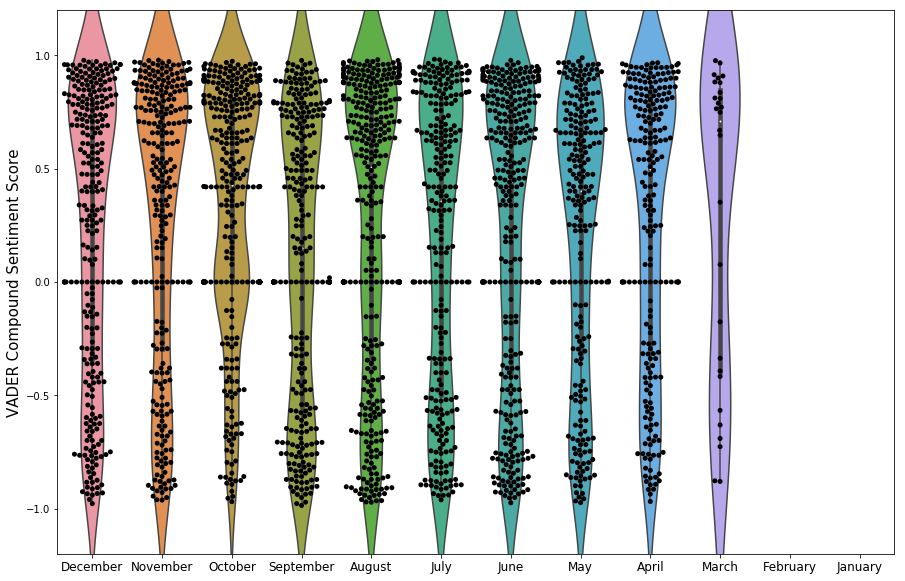

In [53]:
# plot sentiment of tweets according to day of the week
plt.close()
plt.figure(figsize=(15,10))
plt.ylim(-1.2,1.2)
sns.violinplot(x='month_of_year',y='vScore',data=dfRt)
sns.swarmplot(x="month_of_year", y="vScore",data=dfRt, color="black")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1.png')